In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
import os 
os.listdir('./Automobile/')

['.vscode',
 'automobile.csv',
 'imports-85.data',
 'imports-85.names',
 'Index',
 'misc']

In [3]:
df_automobile =pd.read_csv('./Automobile/automobile.csv')

Data cleaning 
replace '?' to NAN

In [4]:
data =df_automobile.replace('?',np.NAN)
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Miss value modifying 

In [5]:
# bore
df_temp = df_automobile[df_automobile['normalized-losses']!='?']
normalised_mean = df_temp['normalized-losses'].astype(int).mean()
df_automobile['normalized-losses'] = df_automobile['normalized-losses'].replace('?',normalised_mean).astype(int)
# num-of-doors
df_automobile['num-of-doors'] = df_automobile['num-of-doors'].replace('?','four')
# bore
df_temp = df_automobile[df_automobile['bore'] != '?']
normalised_mean = df_temp['bore'].astype(float).mean()
df_automobile['bore'] = df_automobile['bore'].replace(
    '?', normalised_mean).astype(float)
# stroke
df_temp = df_automobile[df_automobile['stroke'] != '?']
normalised_mean = df_temp['stroke'].astype(float).mean()
df_automobile['stroke'] = df_automobile['stroke'].replace(
    '?', normalised_mean).astype(float)
# horsepower
df_temp = df_automobile[df_automobile['horsepower'] != '?']
normalised_mean = df_temp['horsepower'].astype(int).mean()
df_automobile['horsepower'] = df_automobile['horsepower'].replace(
    '?', normalised_mean).astype(int)
# peak-rpm
df_temp = df_automobile[df_automobile['peak-rpm'] != '?']
normalised_mean = df_temp['peak-rpm'].astype(int).mean()
df_automobile['peak-rpm'] = df_automobile['peak-rpm'].replace(
    '?', normalised_mean).astype(int)
# price
df_temp = df_automobile[df_automobile['price'] != '?']
normalised_mean = df_temp['price'].astype(int).mean()
df_automobile['price'] = df_automobile['price'].replace('?',normalised_mean).astype(int)

In [6]:
df_automobile.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df_automobile.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [8]:
df_automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df_automobile.index

RangeIndex(start=0, stop=205, step=1)

### Task 1

In [10]:
df_automobile['make'].value_counts()



toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

mazda            17

### Task 2
How many different (unique) combinations of {fuel type, aspiration, number-of-doors, body style, drive wheels, engine location}

In [11]:
df = df_automobile.iloc[:,3:9]

# df.groupby(
#     list(df.keys())).transform(lambda x:(~x.duplicated()).cumsum())

df.groupby(list(df.keys())).size().reset_index().rename(columns={0:'count'})

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,count
0,diesel,std,four,hatchback,fwd,front,1
1,diesel,std,four,sedan,fwd,front,3
2,diesel,std,four,sedan,rwd,front,1
3,diesel,std,two,sedan,fwd,front,2
4,diesel,turbo,four,sedan,fwd,front,3
5,diesel,turbo,four,sedan,rwd,front,6
6,diesel,turbo,four,wagon,rwd,front,3
7,diesel,turbo,two,hardtop,rwd,front,1
8,gas,std,four,hatchback,fwd,front,9
9,gas,std,four,sedan,4wd,front,2


### Task 3
What is the median and average price of four door vehicles?

mean

In [12]:
df = df_automobile[['num-of-doors','price']]

df.groupby(['num-of-doors']).agg(['mean'])



,price
,mean
num-of-doors,
four,13495.525862
two,12831.235955


median

In [13]:
df.groupby(['num-of-doors'])['price'].median()


num-of-doors
four    11071.5
two      9980.0
Name: price, dtype: float64

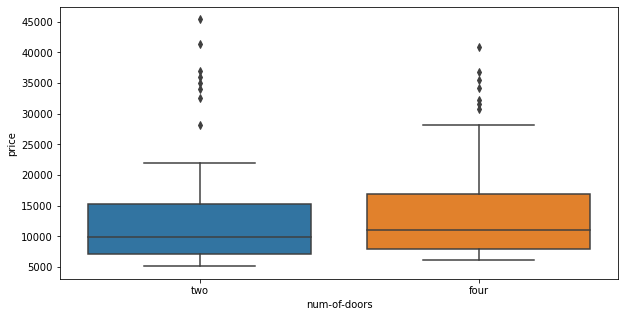

In [14]:
plt.rcParams['figure.figsize'] = (10, 5)
ax = sns.boxplot(x="num-of-doors", y="price", data=df_automobile)


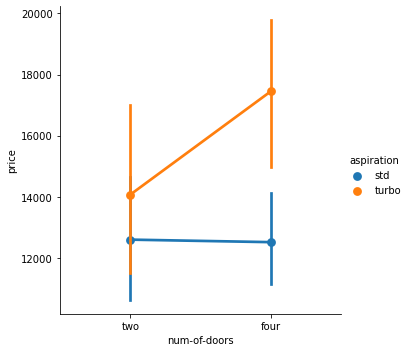

In [15]:
sns.catplot(data=df_automobile, x="num-of-doors", y="price", hue="aspiration" ,kind="point")

Summary statistics of variable